In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler

In [6]:
# Directory path to save the CSV files
output_path = '../data/raw/'

In [8]:
# Function to load data from Yahoo Finance for a specific asset
def load_data(symbol, start_date='2015-01-01', end_date='2024-10-31'):
 data = yf.download(symbol, start=start_date, end=end_date)
 data['Symbol'] = symbol  # Add symbol column to identify asset
    
# Save the data to a CSV file in the raw data folder
 data.to_csv(f"{output_path}{symbol}_data.csv")
 return data

In [10]:
# Load data for all assets (TSLA, BND, SPY) and save them as CSVs
tsla_data = load_data('TSLA')
bnd_data = load_data('BND')
spy_data = load_data('SPY')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
# Check for missing values
print("tsla\n", tsla_data.isnull().sum())
print("bnd_data\n", bnd_data.isnull().sum())
print("spy_data\n", spy_data.isnull().sum())

tsla
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64
bnd_data
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64
spy_data
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64


In [17]:
print(tsla_data.head())
print(bnd_data.head())
print(spy_data.head())

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2015-01-02  14.858000  14.883333  14.217333  14.620667  14.620667  71466000   
2015-01-05  14.303333  14.433333  13.810667  14.006000  14.006000  80527500   
2015-01-06  14.004000  14.280000  13.614000  14.085333  14.085333  93928500   
2015-01-07  14.223333  14.318667  13.985333  14.063333  14.063333  44526000   
2015-01-08  14.187333  14.253333  14.000667  14.041333  14.041333  51637500   

           Symbol  
Date               
2015-01-02   TSLA  
2015-01-05   TSLA  
2015-01-06   TSLA  
2015-01-07   TSLA  
2015-01-08   TSLA  
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2015-01-02  82.430000  82.690002  82.419998  82.650002  63.358768  2218800   
2015-01-05  82.739998  82.919998  82.699997  82.889999  63.542805  58201

## Normalize the Data

In [18]:
scaler = StandardScaler()

In [19]:
tsla_data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(tsla_data[['Open', 'High', 'Low', 'Close', 'Volume']])
bnd_data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(bnd_data[['Open', 'High', 'Low', 'Close', 'Volume']])
spy_data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(spy_data[['Open', 'High', 'Low', 'Close', 'Volume']])

## Exploratory Data Analysis (EDA)

### Visualize the closing price over time to identify trends and patterns

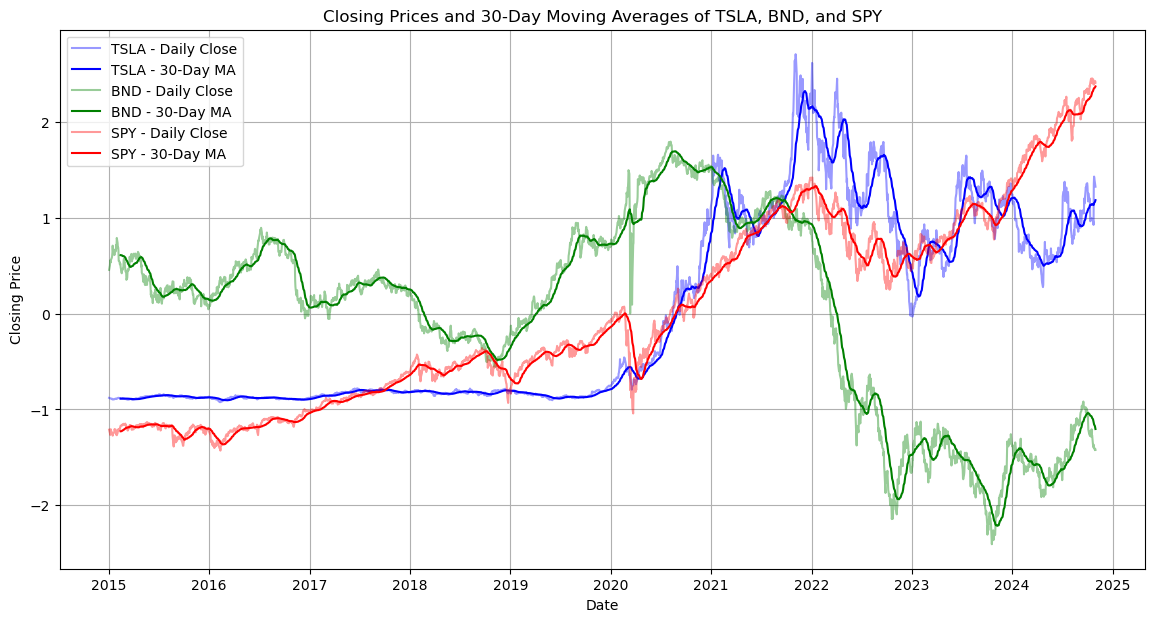

In [20]:
import matplotlib.pyplot as plt

# Calculate moving averages to smooth out daily fluctuations
tsla_data['Close_MA'] = tsla_data['Close'].rolling(window=30).mean()
bnd_data['Close_MA'] = bnd_data['Close'].rolling(window=30).mean()
spy_data['Close_MA'] = spy_data['Close'].rolling(window=30).mean()

# Plot with improved layout
plt.figure(figsize=(14, 7))
plt.plot(tsla_data['Close'], label='TSLA - Daily Close', color='blue', alpha=0.4)
plt.plot(tsla_data['Close_MA'], label='TSLA - 30-Day MA', color='blue')
plt.plot(bnd_data['Close'], label='BND - Daily Close', color='green', alpha=0.4)
plt.plot(bnd_data['Close_MA'], label='BND - 30-Day MA', color='green')
plt.plot(spy_data['Close'], label='SPY - Daily Close', color='red', alpha=0.4)
plt.plot(spy_data['Close_MA'], label='SPY - 30-Day MA', color='red')

# Titles and labels
plt.title('Closing Prices and 30-Day Moving Averages of TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


## Calculate daily returns

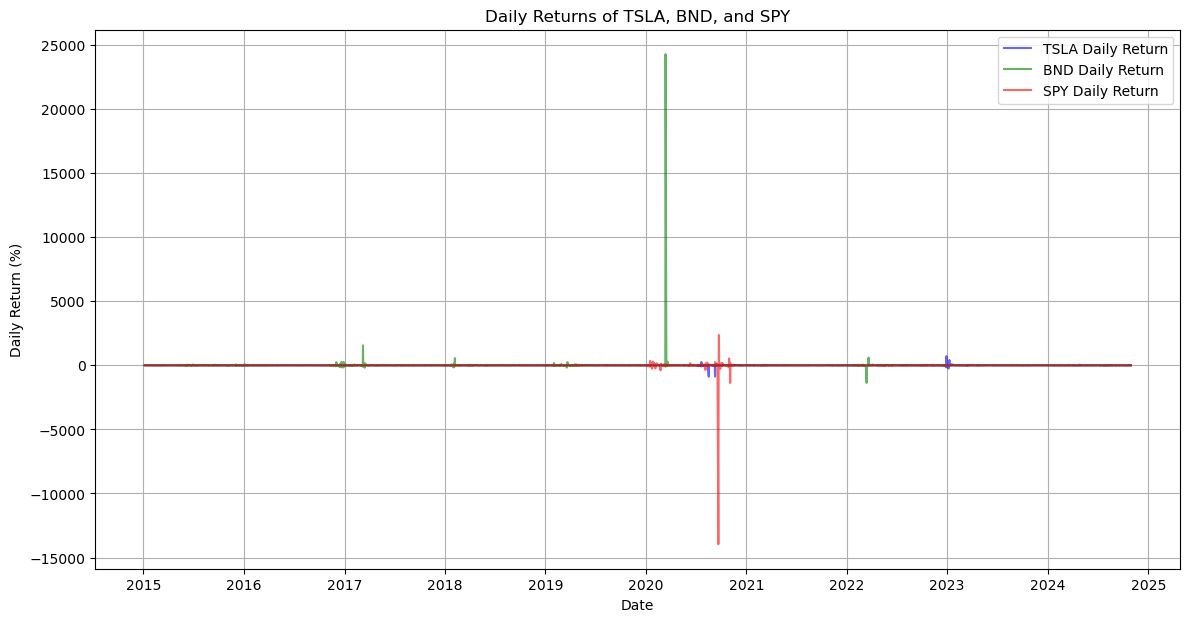

In [21]:
import matplotlib.pyplot as plt

# Calculate daily returns as percentage change
tsla_data['Daily Return'] = tsla_data['Close'].pct_change() * 100
bnd_data['Daily Return'] = bnd_data['Close'].pct_change() * 100
spy_data['Daily Return'] = spy_data['Close'].pct_change() * 100

# Plot daily returns
plt.figure(figsize=(14, 7))
plt.plot(tsla_data['Daily Return'], label='TSLA Daily Return', color='blue', alpha=0.6)
plt.plot(bnd_data['Daily Return'], label='BND Daily Return', color='green', alpha=0.6)
plt.plot(spy_data['Daily Return'], label='SPY Daily Return', color='red', alpha=0.6)

# Titles and labels
plt.title('Daily Returns of TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.show()


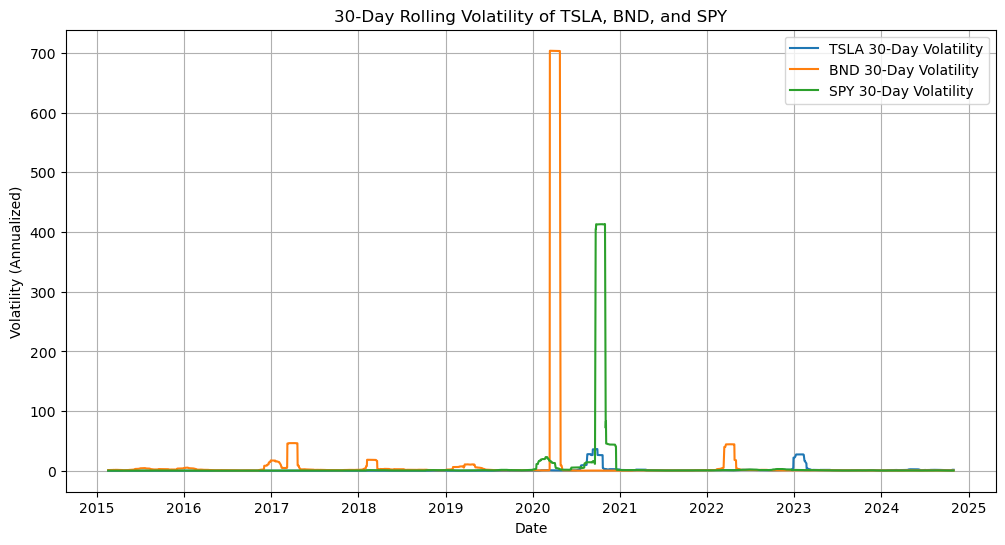

In [23]:
import matplotlib.pyplot as plt

# Calculate daily returns for each stock
returns = pd.DataFrame({ticker: data['Close'].pct_change() for ticker, data in data_frames.items()})

# Calculate 30-day rolling volatility (standard deviation of daily returns)
volatility = returns.rolling(window=30).std() * (252 ** 0.5)  # Annualized volatility, assuming 252 trading days

# Plot the volatility
plt.figure(figsize=(12, 6))
for ticker in volatility.columns:
    plt.plot(volatility[ticker], label=f'{ticker} 30-Day Volatility')

# Adding title, labels, and legend
plt.legend()
plt.title('30-Day Rolling Volatility of TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Volatility (Annualized)')
plt.grid(True)
plt.show()


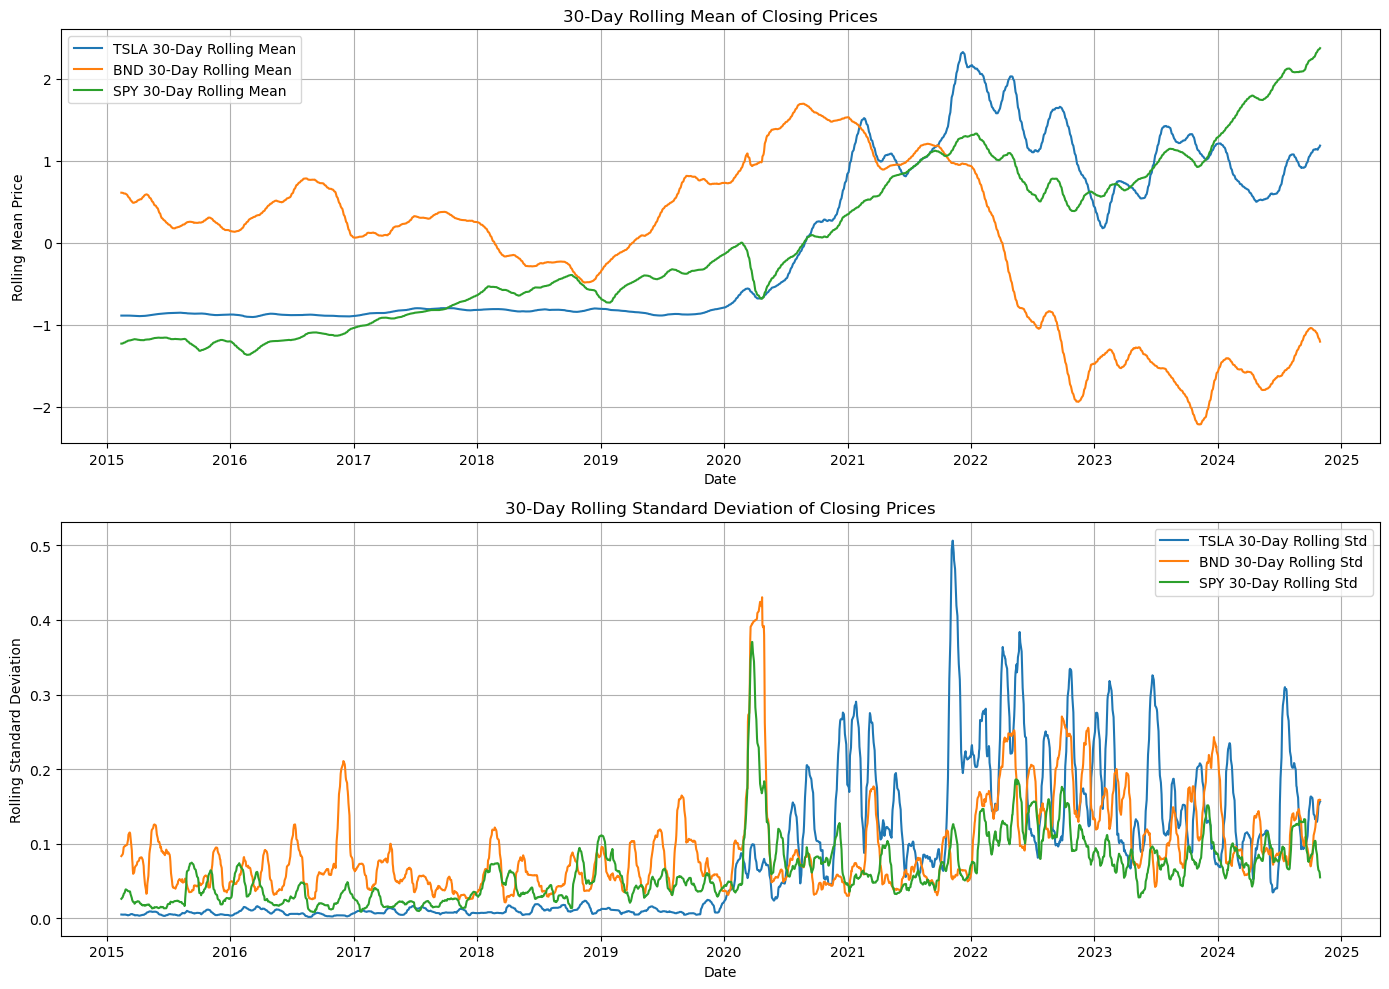

In [25]:
import matplotlib.pyplot as plt

# Define rolling window (e.g., 30 days for short-term trends)
rolling_window = 30

# Calculate rolling means and standard deviations for each ticker
data_frames = {'TSLA': tsla_data, 'BND': bnd_data, 'SPY': spy_data}

# Create a dictionary to hold rolling mean and standard deviation data
rolling_data = {
    ticker: {
        'Rolling Mean': data['Close'].rolling(window=rolling_window).mean(),
        'Rolling Std': data['Close'].rolling(window=rolling_window).std()
    }
    for ticker, data in data_frames.items()
}

# Plotting rolling means and standard deviations
plt.figure(figsize=(14, 10))

# Plot rolling mean
plt.subplot(2, 1, 1)
for ticker, metrics in rolling_data.items():
    plt.plot(metrics['Rolling Mean'], label=f'{ticker} {rolling_window}-Day Rolling Mean')
plt.title(f'{rolling_window}-Day Rolling Mean of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Rolling Mean Price')
plt.legend()
plt.grid(True)

# Plot rolling standard deviation
plt.subplot(2, 1, 2)
for ticker, metrics in rolling_data.items():
    plt.plot(metrics['Rolling Std'], label=f'{ticker} {rolling_window}-Day Rolling Std')
plt.title(f'{rolling_window}-Day Rolling Standard Deviation of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Perform Outlier Detection: Identify significant anomalies in the daily returns

In [27]:
# Calculate daily percentage change for each stock
tsla_data['Daily Change'] = tsla_data['Close'].pct_change() * 100
bnd_data['Daily Change'] = bnd_data['Close'].pct_change() * 100
spy_data['Daily Change'] = spy_data['Close'].pct_change() * 100

# Define a threshold for detecting extreme changes (e.g., 5% move)
threshold = 5  # Define a threshold for extreme daily changes

# Identify outliers based on the threshold
outliers_tsla = tsla_data[tsla_data['Daily Change'].abs() > threshold]
outliers_bnd = bnd_data[bnd_data['Daily Change'].abs() > threshold]
outliers_spy = spy_data[spy_data['Daily Change'].abs() > threshold]

# Display outliers
print("\nOutliers Detected in TSLA:")
print(outliers_tsla[['Close', 'Daily Change']])

print("\nOutliers Detected in BND:")
print(outliers_bnd[['Close', 'Daily Change']])

print("\nOutliers Detected in SPY:")
print(outliers_spy[['Close', 'Daily Change']])



Outliers Detected in TSLA:
               Close  Daily Change
Date                              
2020-01-30 -0.624155     -5.485086
2020-02-03 -0.539872    -12.676607
2020-02-04 -0.475045    -12.007835
2020-02-05 -0.567302     19.420681
2020-02-18 -0.492400     -6.697225
...              ...           ...
2024-10-04  1.259249      7.289833
2024-10-07  1.175233     -6.671906
2024-10-11  0.966056    -16.468884
2024-10-24  1.353710     45.816990
2024-10-25  1.432821      5.844022

[537 rows x 2 columns]

Outliers Detected in BND:
               Close  Daily Change
Date                              
2015-01-05  0.505039     10.282849
2015-01-06  0.552129      9.324069
2015-01-09  0.563902      5.120747
2015-01-14  0.638462      6.201208
2015-01-15  0.711060     11.370842
...              ...           ...
2024-09-25 -1.031292      5.626937
2024-10-03 -1.113700      6.172830
2024-10-04 -1.209843      8.632742
2024-10-17 -1.278516      5.847930
2024-10-21 -1.368774      7.720765

[1031 rows

## Analyze days with unusually high or low returns (based on the outliers identified)


TSLA High Returns Outliers (Days with > 5%):
               Close  Daily Change
Date                              
2020-02-05 -0.567302     19.420681
2020-02-24 -0.507301      8.721952
2020-02-27 -0.601030     11.178507
2020-03-09 -0.644022      9.862572
2020-03-12 -0.672754      7.102687
...              ...           ...
2024-09-19  1.203299     14.443549
2024-09-23  1.258522      9.265755
2024-10-04  1.259249      7.289833
2024-10-24  1.353710     45.816990
2024-10-25  1.432821      5.844022

[265 rows x 2 columns]

TSLA Low Returns Outliers (Days with < -5%):
               Close  Daily Change
Date                              
2020-01-30 -0.624155     -5.485086
2020-02-03 -0.539872    -12.676607
2020-02-04 -0.475045    -12.007835
2020-02-18 -0.492400     -6.697225
2020-02-19 -0.456662     -7.257884
...              ...           ...
2024-09-06  0.901841    -16.373143
2024-10-02  1.249621     -6.139939
2024-10-03  1.173689     -6.076419
2024-10-07  1.175233     -6.671906
2024-10-1

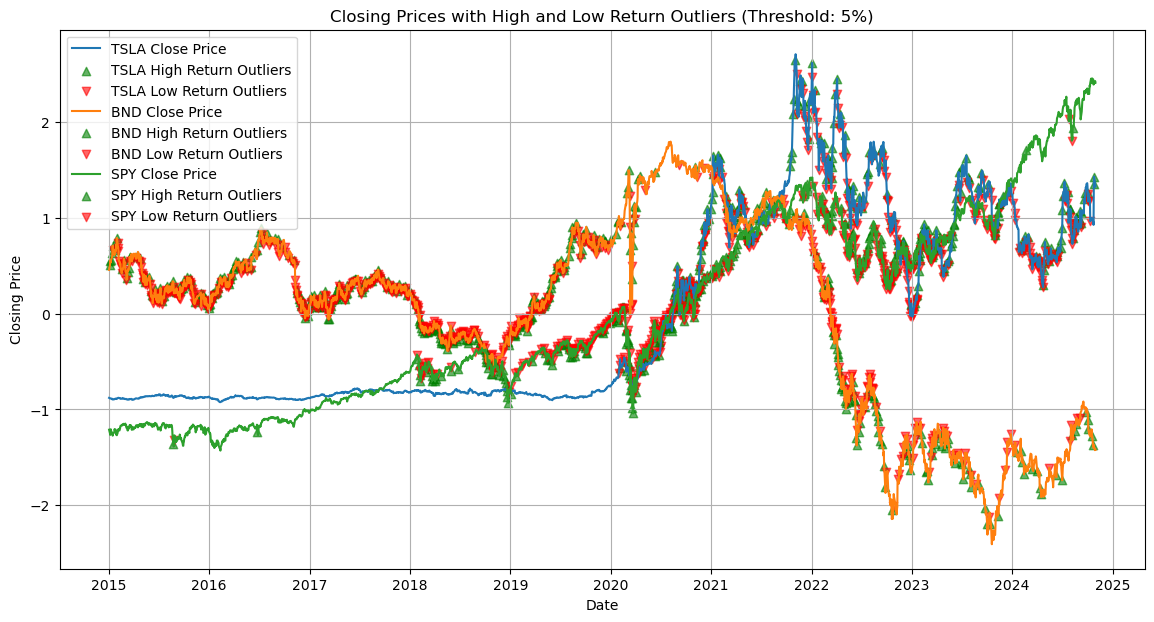

In [29]:
import matplotlib.pyplot as plt

# Define a threshold for extreme returns (e.g., 5% change)
threshold = 5

# Identify and categorize outliers for each stock
outliers = {
    'TSLA': tsla_data[tsla_data['Daily Change'].abs() > threshold],
    'BND': bnd_data[bnd_data['Daily Change'].abs() > threshold],
    'SPY': spy_data[spy_data['Daily Change'].abs() > threshold]
}

# Print summary of high and low outliers for each stock
for ticker, outlier_data in outliers.items():
    high_returns = outlier_data[outlier_data['Daily Change'] > 0]
    low_returns = outlier_data[outlier_data['Daily Change'] < 0]

    print(f"\n{ticker} High Returns Outliers (Days with > {threshold}%):")
    print(high_returns[['Close', 'Daily Change']])

    print(f"\n{ticker} Low Returns Outliers (Days with < -{threshold}%):")
    print(low_returns[['Close', 'Daily Change']])

# Visualize outliers on time series plot
plt.figure(figsize=(14, 7))

# Plot closing prices with high and low return outliers marked
for ticker, data in zip(['TSLA', 'BND', 'SPY'], [tsla_data, bnd_data, spy_data]):
    plt.plot(data['Close'], label=f'{ticker} Close Price')
    high_outliers = outliers[ticker][outliers[ticker]['Daily Change'] > threshold]
    low_outliers = outliers[ticker][outliers[ticker]['Daily Change'] < -threshold]
    
    # Plot high return outliers
    plt.scatter(high_outliers.index, high_outliers['Close'], color='green', label=f'{ticker} High Return Outliers', marker='^', alpha=0.6)
    # Plot low return outliers
    plt.scatter(low_outliers.index, low_outliers['Close'], color='red', label=f'{ticker} Low Return Outliers', marker='v', alpha=0.6)

# Customize plot
plt.title(f'Closing Prices with High and Low Return Outliers (Threshold: {threshold}%)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


## Perform Seasonal Decomposition: Decompose the time series for TSLA to identify trend, seasonality, and residuals

<Figure size 1400x1000 with 0 Axes>

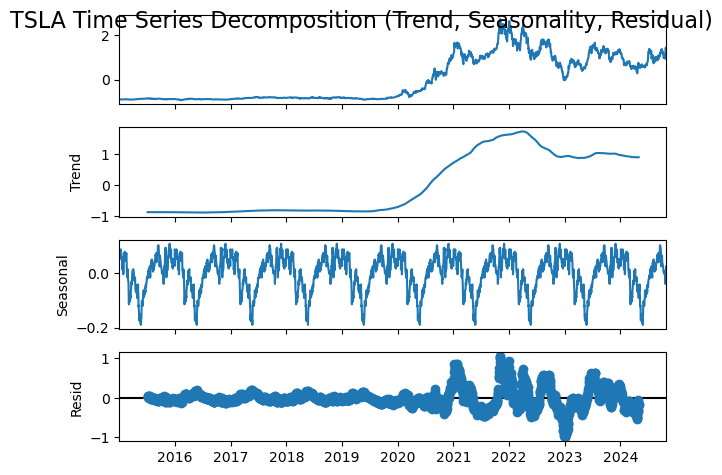

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Extract the 'Close' column from the data
tsla_close = tsla_data[['Close']]

# Check for any zero or negative values
if (tsla_close <= 0).any().any():
    print("Warning: Data contains zero or negative values. Switching to additive model.")
    # Decompose the data using the additive model (if there are non-positive values)
    tsla_decomp = seasonal_decompose(tsla_close, model='additive', period=252)
else:
    # Decompose the data using the multiplicative model (if data is positive)
    tsla_decomp = seasonal_decompose(tsla_close, model='multiplicative', period=252)

# Plot the decomposed components
plt.figure(figsize=(14, 10))
tsla_decomp.plot()
plt.suptitle('TSLA Time Series Decomposition (Trend, Seasonality, Residual)', fontsize=16)
plt.show()

## Volatility Analysis (Rolling Mean and Standard Deviation)

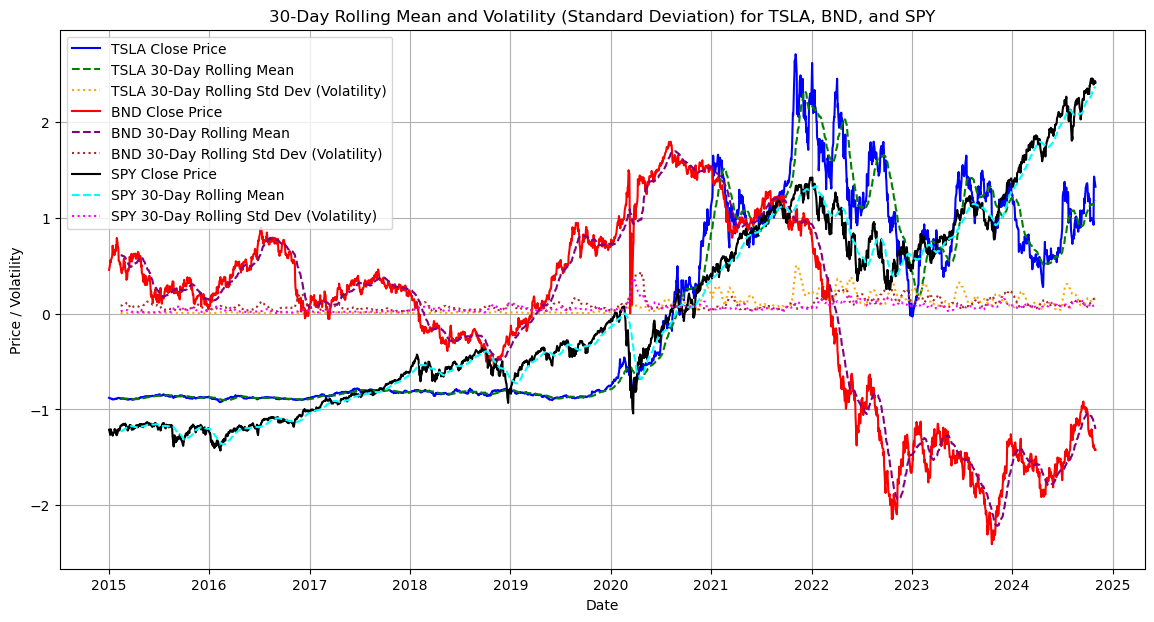

In [32]:
import matplotlib.pyplot as plt

# Define the window size (e.g., 30 days)
window_size = 30

# Calculate rolling mean and rolling standard deviation (volatility)
rolling_mean_tsla = tsla_data['Close'].rolling(window=window_size).mean()
rolling_std_tsla = tsla_data['Close'].rolling(window=window_size).std()

rolling_mean_bnd = bnd_data['Close'].rolling(window=window_size).mean()
rolling_std_bnd = bnd_data['Close'].rolling(window=window_size).std()

rolling_mean_spy = spy_data['Close'].rolling(window=window_size).mean()
rolling_std_spy = spy_data['Close'].rolling(window=window_size).std()

# Plotting the rolling mean and volatility
plt.figure(figsize=(14, 7))

# TSLA rolling mean and volatility
plt.plot(tsla_data['Close'], label='TSLA Close Price', color='blue')
plt.plot(rolling_mean_tsla, label=f'TSLA {window_size}-Day Rolling Mean', color='green', linestyle='--')
plt.plot(rolling_std_tsla, label=f'TSLA {window_size}-Day Rolling Std Dev (Volatility)', color='orange', linestyle=':')

# BND rolling mean and volatility
plt.plot(bnd_data['Close'], label='BND Close Price', color='red')
plt.plot(rolling_mean_bnd, label=f'BND {window_size}-Day Rolling Mean', color='purple', linestyle='--')
plt.plot(rolling_std_bnd, label=f'BND {window_size}-Day Rolling Std Dev (Volatility)', color='brown', linestyle=':')

# SPY rolling mean and volatility
plt.plot(spy_data['Close'], label='SPY Close Price', color='black')
plt.plot(rolling_mean_spy, label=f'SPY {window_size}-Day Rolling Mean', color='cyan', linestyle='--')
plt.plot(rolling_std_spy, label=f'SPY {window_size}-Day Rolling Std Dev (Volatility)', color='magenta', linestyle=':')

# Customize plot
plt.title(f'{window_size}-Day Rolling Mean and Volatility (Standard Deviation) for TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Price / Volatility')
plt.legend()
plt.grid(True)
plt.show()


## Calculate Value at Risk (VaR) and Sharpe Ratio

Value at Risk (VaR) at 95.0% confidence level:
TSLA VaR: -9.28%
BND VaR: -18.24%
SPY VaR: -10.66%

Annualized Sharpe Ratio:
TSLA Sharpe Ratio: -0.14
BND Sharpe Ratio: 0.36
SPY Sharpe Ratio: -0.27


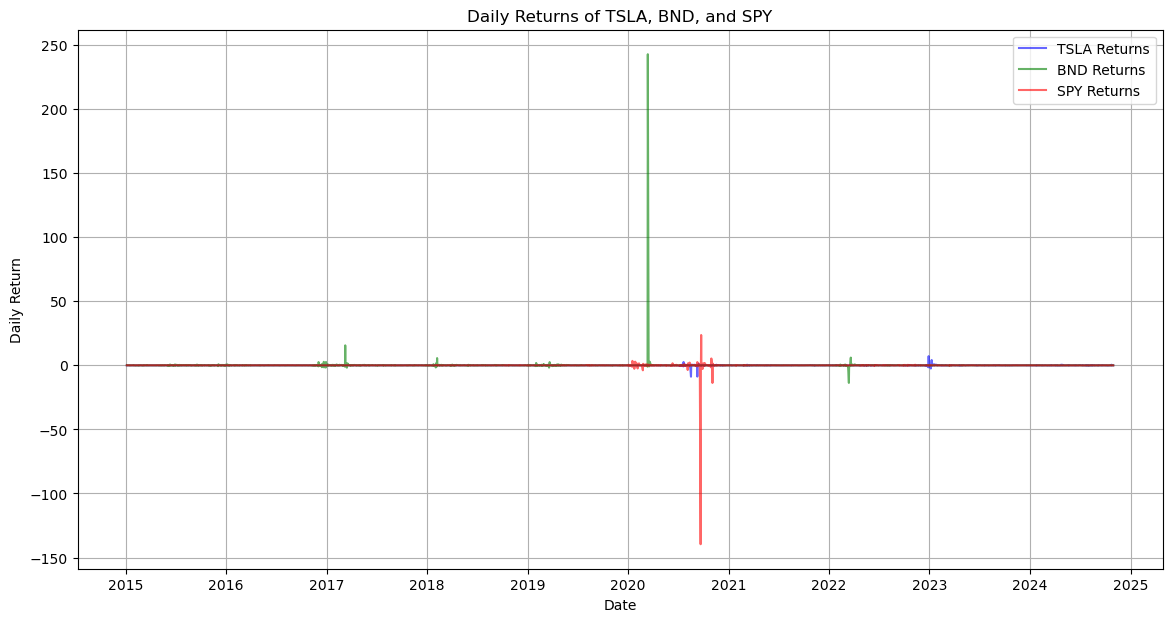

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the confidence level and risk-free rate
confidence_level = 0.95
risk_free_rate = 0.0  # You can change this to a real risk-free rate like 0.02 (2%)

# Calculate daily returns
tsla_returns = tsla_data['Close'].pct_change().dropna()
bnd_returns = bnd_data['Close'].pct_change().dropna()
spy_returns = spy_data['Close'].pct_change().dropna()

# Calculate Value at Risk (VaR) using the historical method
# VaR at 95% confidence level (negative return threshold)
var_tsla = np.percentile(tsla_returns, (1 - confidence_level) * 100)
var_bnd = np.percentile(bnd_returns, (1 - confidence_level) * 100)
var_spy = np.percentile(spy_returns, (1 - confidence_level) * 100)

# Print the VaR
print(f"Value at Risk (VaR) at {confidence_level*100}% confidence level:")
print(f"TSLA VaR: {var_tsla*100:.2f}%")
print(f"BND VaR: {var_bnd*100:.2f}%")
print(f"SPY VaR: {var_spy*100:.2f}%")

# Calculate the annualized Sharpe Ratio
# Sharpe Ratio = (mean_return - risk_free_rate) / standard_deviation
annualized_sharpe_tsla = (tsla_returns.mean() - risk_free_rate) / tsla_returns.std() * np.sqrt(252)
annualized_sharpe_bnd = (bnd_returns.mean() - risk_free_rate) / bnd_returns.std() * np.sqrt(252)
annualized_sharpe_spy = (spy_returns.mean() - risk_free_rate) / spy_returns.std() * np.sqrt(252)

# Print the Sharpe Ratio
print(f"\nAnnualized Sharpe Ratio:")
print(f"TSLA Sharpe Ratio: {annualized_sharpe_tsla:.2f}")
print(f"BND Sharpe Ratio: {annualized_sharpe_bnd:.2f}")
print(f"SPY Sharpe Ratio: {annualized_sharpe_spy:.2f}")

# Plotting the returns for comparison
plt.figure(figsize=(14, 7))

# Plot daily returns for TSLA, BND, and SPY
plt.plot(tsla_returns, label='TSLA Returns', color='blue', alpha=0.6)
plt.plot(bnd_returns, label='BND Returns', color='green', alpha=0.6)
plt.plot(spy_returns, label='SPY Returns', color='red', alpha=0.6)

plt.title('Daily Returns of TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()


##  Calculate and Visualize the Correlation Matrix

Correlation Matrix:
          TSLA       BND       SPY
TSLA  1.000000  0.001133 -0.019351
BND   0.001133  1.000000 -0.001435
SPY  -0.019351 -0.001435  1.000000


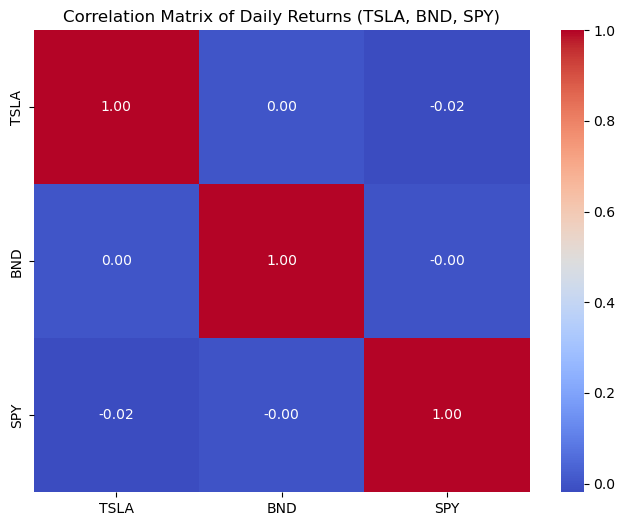

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate daily returns for TSLA, BND, and SPY
tsla_returns = tsla_data['Close'].pct_change().dropna()
bnd_returns = bnd_data['Close'].pct_change().dropna()
spy_returns = spy_data['Close'].pct_change().dropna()

# Combine returns into a single DataFrame
returns_df = pd.DataFrame({
    'TSLA': tsla_returns,
    'BND': bnd_returns,
    'SPY': spy_returns
})

# Calculate the correlation matrix
correlation_matrix = returns_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Daily Returns (TSLA, BND, SPY)')
plt.show()
